# Inference

Here we use the saved trained model to infering images.

In [1]:
! wget https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/adad.png

--2025-05-13 14:48:05--  https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/adad.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 566 [image/png]
Saving to: ‘adad.png’

adad.png            100%[===================>]     566  --.-KB/s    in 0s      

2025-05-13 14:48:05 (18.3 MB/s) - ‘adad.png’ saved [566/566]



In [2]:
import pickle

neigh = pickle.load(open('knclassier_pickle', 'rb'))

In [3]:
import numpy as np
import cv2

img = cv2.imread('adad.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=(15, 15))
img = np.reshape(img, [-1, 15*15])

In [4]:
neigh.predict(img)

array([3], dtype=uint8)

In [14]:
! wget https://github.com/Alireza-Akhavan/SRU-deep-1402/blob/master/images/persian-digits.jpg?raw=true -O persian-digits.jpg

--2025-05-13 14:52:35--  https://github.com/Alireza-Akhavan/SRU-deep-1402/blob/master/images/persian-digits.jpg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Alireza-Akhavan/SRU-deep-1402/raw/refs/heads/master/images/persian-digits.jpg [following]
--2025-05-13 14:52:35--  https://github.com/Alireza-Akhavan/SRU-deep-1402/raw/refs/heads/master/images/persian-digits.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deep-1402/refs/heads/master/images/persian-digits.jpg [following]
--2025-05-13 14:52:35--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deep-1402/refs/heads/master/images/persian-digits.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199

In [15]:
img = cv2.imread('persian-digits.jpg', cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
img = 255 - img
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=8)

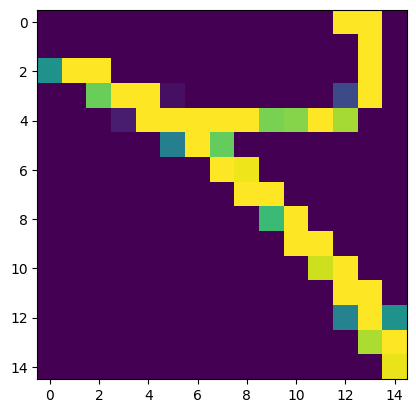

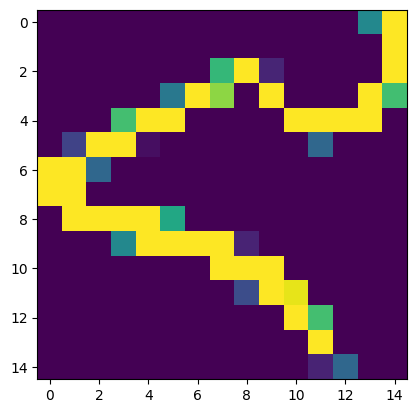

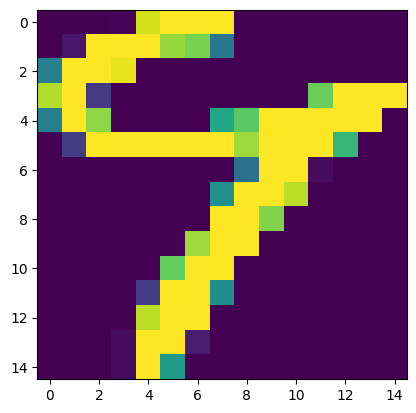

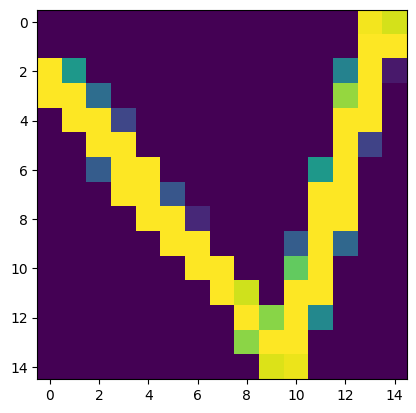

In [17]:
import matplotlib.pyplot as plt

test_img = []
# Iterate through each connected component
for label in range(1, num_labels):
    # Get the bounding box of the current connected component
    x, y, w, h = stats[label][:4]
    # Crop the connected component using the bounding box
    connected_component = img[y:y+h, x:x+w]

    if len(np.unique(connected_component)) > 1:
      connected_component = cv2.resize(connected_component, dsize=(15, 15))
      test_img.append(connected_component)

      # Display or save the cropped connected component
      plt.imshow(connected_component)
      plt.show()

In [18]:
test_img = np.stack(test_img)
test_img = test_img.reshape(-1, 15*15)
print(test_img.shape)
neigh.predict(test_img)

(4, 225)


array([2, 3, 6, 7], dtype=uint8)